In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def linear_regression(x, y):
    n = len(x)

    # Calculations
    xi_sum = np.sum(x)
    yi_sum = np.sum(y)
    xi_squared_sum = np.sum(x**2)
    xiyi_sum = np.sum(x * y)

    x_mean = xi_sum / n
    y_mean = yi_sum / n

    a1 = (n * xiyi_sum - xi_sum * yi_sum) / (n * xi_squared_sum - xi_sum**2)
    a0 = y_mean - a1 * x_mean

    y_pred = a0 + a1 * x

    St = np.sum((y - y_mean) ** 2)
    Sr = np.sum((y - y_pred) ** 2)
    sy = np.sqrt(St / (n - 1))
    sy_x = np.sqrt(Sr / (n - 2))
    r2 = 1 - (Sr / St)
    r = np.sqrt(r2)

    # Creating tables
    table1 = pd.DataFrame({"xi": x, "yi": y, "xi^2": x**2, "xi.yi": x * y})
    sums = table1.sum()
    averages = table1.mean()
    table1.loc["Sum"] = sums
    table1.loc["Average"] = averages

    table2 = pd.DataFrame({"xi": x, "yi": y, "yl (predicted)": y_pred})

    table3 = pd.DataFrame(
        {
            "xi": x,
            "yi": y,
            "a0+a1*xi": y_pred,
            "(yi-y_ave)^2": (y - y_mean) ** 2,
            "(yi-a0-a1*xi)^2": (y - y_pred) ** 2,
        }
    )
    sums = table3.sum()
    averages = table3.mean()
    table3.loc["Sum"] = sums
    table3.loc["Average"] = averages

    # Printing the tables
    print("Table 1:")
    print(table1, "\n")

    print("Table 2:")
    print(table2, "\n")

    print("Table 3:")
    print(table3, "\n")

    # Summary Statistics
    print("\nSummary Statistics:")
    print(f"sy (total standard deviation): {sy:.4f}")
    print(f"sy/x (standard error of the estimate): {sy_x:.4f}")
    print(f"r^2 (coefficient of determination): {r2:.4f}")
    print(f"r (correlation coefficient): {r:.4f}")
    print(f"Regression line: y = {a0:.4f} + {a1:.4f}x")

    # Plotting the results
    plt.scatter(x, y, label="Data Points")
    plt.plot(x, y_pred, color="red", label="Regression Line")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.title("Linear Regression")
    plt.show()

Table 1:
           xi     yi        xi^2        xi.yi
0         1.2   90.0    1.440000   108.000000
1         1.7   90.0    2.890000   153.000000
2         2.3   83.0    5.290000   190.900000
3         3.1   73.0    9.610000   226.300000
4         3.5   83.0   12.250000   290.500000
5         4.3   85.0   18.490000   365.500000
6         4.5   77.0   20.250000   346.500000
7         4.5   64.0   20.250000   288.000000
8         4.8   68.0   23.040000   326.400000
9         5.6   65.0   31.360000   364.000000
10        6.1   68.0   37.210000   414.800000
11        6.4   54.0   40.960000   345.600000
Sum      48.0  900.0  223.040000  3419.500000
Average   4.0   75.0   18.586667   284.958333 

Table 2:
     xi    yi  yl (predicted)
0   1.2  90.0       91.282216
1   1.7  90.0       88.374678
2   2.3  83.0       84.885631
3   3.1  73.0       80.233570
4   3.5  83.0       77.907539
5   4.3  85.0       73.255477
6   4.5  77.0       72.092461
7   4.5  64.0       72.092461
8   4.8  68.0       

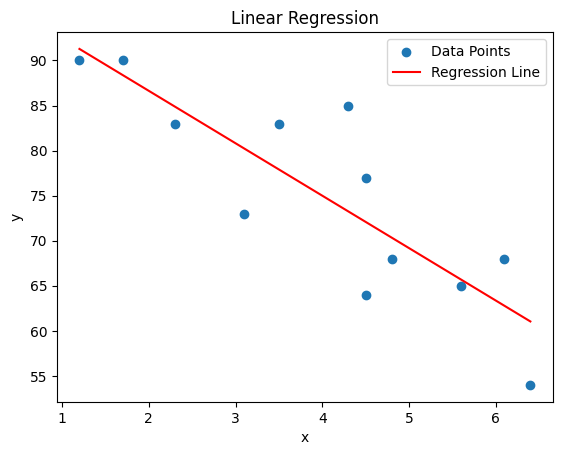

In [3]:
# Example usage
x = np.array([1.2, 1.7, 2.3, 3.1, 3.5, 4.3, 4.5, 4.5, 4.8, 5.6, 6.1, 6.4], dtype=float)
y = np.array([90, 90, 83, 73, 83, 85, 77, 64, 68, 65, 68, 54], dtype=float)

linear_regression(x, y)